# Systems of axial bars

### Example from course reader

In [36]:
from FEA import *

assembly_mat_1 = np.array([[0, 0, 1, 0], [0, 0, 0, 1]])
assembly_mat_2 = np.array([[0, 0, 1, 0], [0, 0, 0, 1]])

element1 = Element(assembly_mat_1, 200e9, 10, (np.pi * (0.1 ** 2)) / 4, 0)
element2 = Element(assembly_mat_2, 200e9, 10 * 1.41, (np.pi * (0.1 ** 2)) / 4, 45)

Q = np.array([[0], [100e3]]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

for element in structure.elements:
    print(element.global_force_vector)

[[ 100000.]
 [      0.]
 [-100000.]
 [      0.]]
[[-100000.]
 [-100000.]
 [ 100000.]
 [ 100000.]]


# Question 3

In [29]:
assembly_mat_1 = np.array([[0, 0, 1, 0], [0, 0, 0, 1]])
assembly_mat_2 = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])

element1 = Element(assembly_mat_1, 200e9, 1.1, 400e-6, 0)
element2 = Element(assembly_mat_2, 200e9, 0.8, 600e-6, 55)

Q = np.array([[0], [-20e3]]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

for element in structure.elements:
    print(element.global_force_vector)

[[-14004.15076419]
 [     0.        ]
 [ 14004.15076419]
 [     0.        ]]
[[-14004.15076419]
 [-20000.        ]
 [ 14004.15076419]
 [ 20000.        ]]


### choosing a different orientation (different assembly matrices)

In [41]:
assembly_mat_1 = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
assembly_mat_2 = np.array([[0, 0, 1, 0], [0, 0, 0, 1]])

element1 = Element(assembly_mat_1, 200e9, 1.1, 400e-6, 0)
element2 = Element(assembly_mat_2, 200e9, 0.8, 600e-6, 55)

Q = np.array([[0], [-20e3]]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

for element in structure.elements:
    print(element.global_force_vector)

[[ 14004.15076419]
 [     0.        ]
 [-14004.15076419]
 [     0.        ]]
[[ 14004.15076419]
 [ 20000.        ]
 [-14004.15076419]
 [-20000.        ]]


### Plotting the deformed shape graph

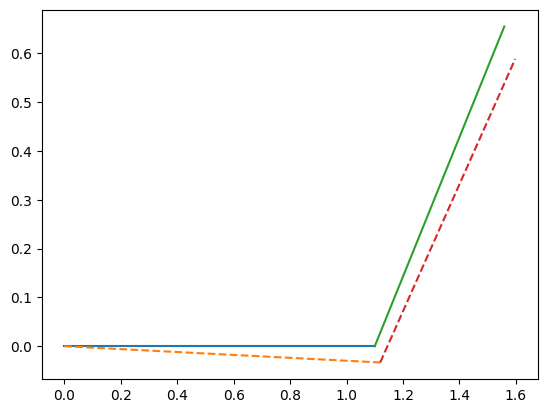

In [55]:
import matplotlib.pyplot as plt

x_tot = x_tot_defl = 0
y_tot = y_tot_defl = 0

resolution = 2

mag = 100

for element in structure.elements:

    if(element.angle == 0):
        x = element.L
        y = element.L * np.tan(np.deg2rad(element.angle))
    elif(element.angle > 0):
        x = element.L * np.cos(np.deg2rad(element.angle))
        y = element.L * np.sin(np.deg2rad(element.angle))

    plt.plot(np.linspace(x_tot, x + x_tot, resolution), np.linspace(y_tot, y + y_tot, resolution))
    
    plt.plot(np.linspace(x_tot_defl, x + x_tot_defl + structure.q[:,0][0] * mag, resolution), np.linspace(y_tot_defl, y + y_tot_defl + structure.q[:,0][1] * mag, resolution), '--')

    x_tot += x
    y_tot += y

    x_tot_defl += x + structure.q[:,0][0] * mag
    y_tot_defl += y + structure.q[:,0][1] * mag

plt.show()